In [66]:
import numpy as np
import pandas as pd
import seaborn as sns

### one-sample proportion test

In [1]:
from statsmodels.stats.proportion import proportions_ztest

H0: Proportion of female smokers in bangalore = 15%

H1: Proportion of female smokers in banganlore != 15%

In [3]:
P = 0.15
n = 500
nfemale = 100

proportions_ztest(nfemale,n,P)

(2.7950849718747377, 0.005188607552315556)

### two-sample proportion test

H0: Porportion of female smokers = proportion of male smokers

H1: Porportion of female smokers != proportion of male smokers

In [9]:
nmale = 500
xmale = 200
nfemale = 500
xfemale = 150

proportions_ztest([xmale, xfemale], [nmale, nfemale])

(3.3149677206589807, 0.0009165370761145276)

In [8]:
help(proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : integer or array_like
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : integer or array-like
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : string in ['two-s

### chi-square test

In [14]:
brandpref = np.array([15,12,10,10,6,8,9,10]).reshape(4,2)
brandpref

array([[15, 12],
       [10, 10],
       [ 6,  8],
       [ 9, 10]])

In [17]:
import scipy.stats as stats
print("(chi2-statistic, p-value, dof, expected matrix):\n", stats.chi2_contingency(brandpref))

(chi2-statistic, p-value, dof, expected matrix):
 (0.6716791979949874, 0.8798441932056964, 3, array([[13.5, 13.5],
       [10. , 10. ],
       [ 7. ,  7. ],
       [ 9.5,  9.5]]))


## Case study 1: Personal Loan

In [24]:
df = pd.read_csv("C:/Users/shara/Desktop/GreatLearning/Week5-Statistics/cs1.csv")
df.head()

id  age  gender      region   income married  children  car save_act  \
0  ID12101   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1  ID12102   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2  ID12103   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3  ID12104   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4  ID12105   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage   pl  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO

### Association between pl and region

H0 : There is no association between pl and region

H1 : There is association between pl and region

In [27]:
alpha = 0.05

ct_pl_region = pd.crosstab(df["pl"], df["region"])
ct_pl_region

region  INNER_CITY  RURAL  SUBURBAN  TOWN
pl                                       
NO              85     26        14    57
YES             70     28        11    39

In [34]:
# critical value
stats.chi2.ppf(0.95,3)

7.814727903251179

In [30]:
stats.chi2_contingency(ct_pl_region)

(1.776514811293037,
 0.6200588623676881,
 3,
 array([[85.48484848, 29.78181818, 13.78787879, 52.94545455],
        [69.51515152, 24.21818182, 11.21212121, 43.05454545]]))

In [56]:
print("Null Hypothesis (H0):", alpha < stats.chi2_contingency(ct_pl_region)[1])

Null Hypothesis (H0): True


### Check for association between no. of children and pl

In [39]:
alpha = 0.05

ct_pl_children = pd.crosstab(df["pl"], df["children"])
ct_pl_children

children   0   1   2   3
pl                      
NO        90  12  50  30
YES       51  57  32   8

In [40]:
stats.chi2_contingency(ct_pl_children)

(53.89216994212963,
 1.1830750145503304e-11,
 3,
 array([[77.76363636, 38.05454545, 45.22424242, 20.95757576],
        [63.23636364, 30.94545455, 36.77575758, 17.04242424]]))

In [58]:
print("Null Hypothesis (H0):", alpha < stats.chi2_contingency(ct_pl_region)[1])

Null Hypothesis (H0): True


## Chi-square goodness of fit

Check whether the rondom alphabet generating machine is good for fitness.

H0 : The machine is fit for random alphabet generation.

H1 : The machine is not fit for random alphabet generation.

In [49]:
alpha = 0.05

arr = np.array([25,19,12,19,25])
arr

array([25, 19, 12, 19, 25])

In [51]:
stats.chisquare(arr)

Power_divergenceResult(statistic=5.8, pvalue=0.21459055821998824)

In [59]:
print("Null Hypothesis (H0):", alpha < stats.chisquare(arr)[1])

Null Hypothesis (H0): True


## ANOVA

H0 : Income does not vary with region

H1 : Income varies with region

In [63]:
alpha = 0.05

df_groupby_region = df.groupby("region")["income"].mean()
arr_ic = df[df["region"] == "INNER_CITY"]["income"]
arr_r = df[df["region"] == "RURAL"]["income"]
arr_s = df[df["region"] == "SUBURBAN"]["income"]
arr_t = df[df["region"] == "TOWN"]["income"]

In [64]:
stats.f_oneway(arr_ic,arr_r,arr_s,arr_t)

F_onewayResult(statistic=1.2950173064832669, pvalue=0.27607567314467585)

In [65]:
stats.f_oneway(df["children"],df["income"])

F_onewayResult(statistic=1435.7391901699834, pvalue=1.5384168960361133e-167)

In [69]:
chl0 = df[df["children"] == 0]["income"]
chl1 = df[df["children"] == 1]["income"]
chl2 = df[df["children"] == 2]["income"]
chl3 = df[df["children"] == 3]["income"]

stats.f_oneway(chl0, chl1, chl2, chl3)

F_onewayResult(statistic=0.5667851690722862, pvalue=0.6372599526845)

## ANOVA post-hoc analysis

In [77]:
# installing pydataset
!pip install pydataset

from pydataset import data
data()

dataset_id  \
0            AirPassengers   
1                  BJsales   
2                      BOD   
3             Formaldehyde   
4             HairEyeColor   
5             InsectSprays   
6           JohnsonJohnson   
7                LakeHuron   
8         LifeCycleSavings   
9                     Nile   
10           OrchardSprays   
11             PlantGrowth   
12               Puromycin   
13                 Titanic   
14             ToothGrowth   
15           UCBAdmissions   
16          UKDriverDeaths   
17                   UKgas   
18             USAccDeaths   
19               USArrests   
20          USJudgeRatings   
21   USPersonalExpenditure   
22                VADeaths   
23                WWWusage   
24             WorldPhones   
25                airmiles   
26              airquality   
27                anscombe   
28                  attenu   
29                attitude   
30                 austres   
31                    cars   
32                chickwts   
33                     co2   
34                 crimtab   
35             discoveries   
36                   esoph   
37                    euro   
38                faithful   
39                  freeny   
40                  infert   
41                    iris   
42                 islands   
43                      lh   
44                 longley   
45                    lynx   
46                  morley   
47                  mtcars   
48                  nhtemp   
49                  nottem   
50                     npk   
51      occupationalStatus   
52                  precip   
53              presidents   
54                pressure   
55                  quakes   
56                   randu   
57                  rivers   
58                    rock   
59                   sleep   
60               stackloss   
61           sunspot.month   
62            sunspot.year   
63                sunspots   
64                   swiss   
65                treering   
66                   trees   
67                   uspop   
68                 volcano   
69              warpbreaks   
70                   women   
71                    acme   
72                    aids   
73               aircondit   
74              aircondit7   
75                    amis   
76                     aml   
77                 bigcity   
78                brambles   
79                 breslow   
80                 calcium   
81                    cane   
82              capability   
83                   catsM   
84                     cav   
..                     ...   
672               students   
673               suicides   
674             toothpaste   
675                 voting   
676                  water   
677             watervoles   
678                  waves   
679             weightgain   
680             womensrole   
681              Bechtoldt   
682            Bechtoldt.1   
683            Bechtoldt.2   
684                  Dwyer   
685                 Gleser   
686                Gorsuch   
687               Harman.5   
688               Harman.8   
689       Harman.political   
690              Holzinger   
691            Holzinger.9   
692                  Reise   
693                 Schmid   
694              Thurstone   
695           Thurstone.33   
696                 Tucker   
697                ability   
698                 affect   
699                    bfi   
700         bfi.dictionary   
701                   blot   
702                   burt   
703                 cities   
704                 cubits   
705                 cushny   
706                    epi   
707                epi.bfi   
708         epi.dictionary   
709                 galton   
710                heights   
711                 income   
712                iqitems   
713                    msq   
714                    neo   
715                   peas   
716                sat.act   
717          withinBetween   
718                  Bosco

In [78]:
df_cw = data("chickwts")
df_cw.head()

weight       feed
1     179  horsebean
2     160  horsebean
3     136  horsebean
4     227  horsebean
5     217  horsebean

In [80]:
df_cw["feed"].value_counts()

soybean      14
casein       12
linseed      12
sunflower    12
meatmeal     11
horsebean    10
Name: feed, dtype: int64

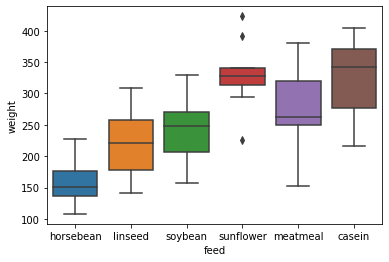

In [82]:
sns.boxplot(data=df_cw, x="feed", y="weight")

H0 : There is no difference in average weights of chickens across feed types

H1 : There is difference in average weights of chickens across feed types

In [84]:
alpha = 0.05

sb = df_cw[df_cw["feed"] == "soybean"]["weight"]
cs = df_cw[df_cw["feed"] == "casein"]["weight"]
ls = df_cw[df_cw["feed"] == "linseed"]["weight"]
sf = df_cw[df_cw["feed"] == "sunflower"]["weight"]
mm = df_cw[df_cw["feed"] == "meatmeal"]["weight"]
hb = df_cw[df_cw["feed"] == "horsebean"]["weight"]

In [86]:
stats.f_oneway(sb,cs,ls,sf,mm,hb)

F_onewayResult(statistic=15.36479977471254, pvalue=5.936419853471331e-10)

In [87]:
print("Null Hypothesis (H0):", stats.f_oneway(sb,cs,ls,sf,mm,hb)[1] > alpha)

Null Hypothesis (H0): False


In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise_tukeyhsd(df_cw["weight"],df_cw["feed"], alpha=0.05).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Two-way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
